# Objective

The primary objective of this project is to develop a Linear Regression model that accurately predicts product sales based on the advertising budgets allocated to TV, Radio, and Newspaper channels. By analyzing the relationship between media spending and sales, this model helps businesses:

Quantify the impact of each advertising medium on sales performance.

Optimize marketing budget allocation for maximum return on investment (ROI).

Make data-driven decisions to improve advertising strategies.

Forecast future sales based on proposed ad spend scenarios.

This project ultimately serves as a tool for understanding and enhancing the effectiveness of marketing efforts using simple, interpretable machine learning techniques.

# Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

# Load Dataset

In [44]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


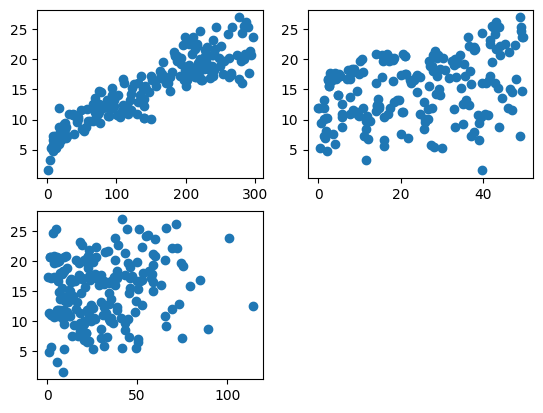

In [45]:
plt.subplot(2,2,1)
plt.scatter(x=df['TV'],y=df['Sales'])

plt.subplot(2,2,2)
plt.scatter(x=df['Radio'],y=df['Sales'])

plt.subplot(2,2,3)
plt.scatter(x=df['Newspaper'],y=df['Sales'])

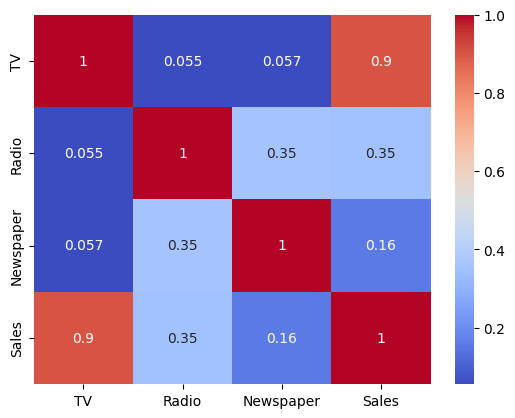

In [ ]:
# check correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Train test split

In [64]:
X = df.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [63]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [47]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

# Applying Linear Regression

In [48]:
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [49]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# Metrics R2_score

In [50]:
mean_absolute_error(y_test,y_pred)

1.2748262109549338

In [51]:
r2_score(y_test,y_test)

1.0

# Predictive system

In [52]:
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features = np.array([[tv_budget,radio_budget,newspaper_budget]])
    results = lr.predict(features).reshape(1,-1)
    return results[0]

In [53]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [54]:
tv_budget= 230.1
radio_budget =  37.8
newspaper_budget =  69.2
sales = predict_sales(tv_budget,radio_budget,newspaper_budget)

C:\Users\FAST COMPUTER 1999\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
sales

array([21.37254028])

# Accuracy Score

In [70]:
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')  # or use 'neg_mean_squared_error'
print("Average R² Score:", np.mean(scores))

Average R² Score: 0.8953723525274102


In [57]:
import pickle

pickle.dump(lr,open('linear_regression_model.pkl','wb'))